In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

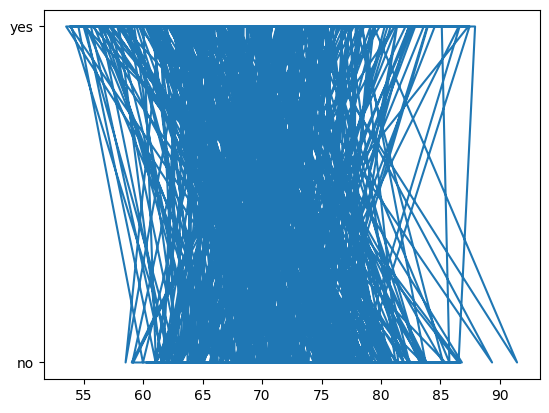

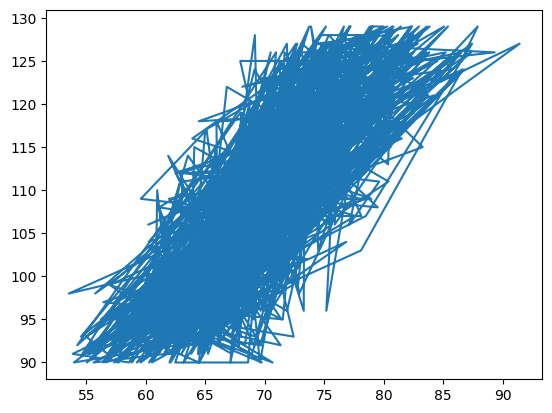

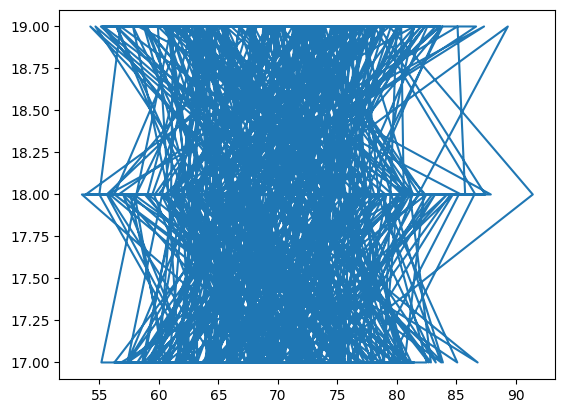

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
data.head()
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
plt.plot(y_train,data.internet)
plt.show()
plt.plot(y_train,data.iq)
plt.show()
plt.plot(y_train,data.age)
plt.show()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
from sklearn.preprocessing import LabelEncoder
def feature_changing(x_train):
    enco = LabelEncoder()
    x_train[:,1] = enco.fit_transform(x_train[:,1])
    x_train[:,0] = enco.fit_transform(x_train[:,0])
    return x_train

x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_normalized = (x_train - x_mean) / x_std
    return x_normalized, x_mean, x_std


In [7]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    y_pred = np.dot(x_train, w) + b
    loss = (1 / (2 *  len(y_train) )) * np.sum((y_pred - y_train) ** 2)
  # ---------

    return loss

In [5]:

def gradient_descent(x_train,y_train,w,b):
  m,n=x_train.shape
  dj_dw = np.zeros((n,1))
  dj_db = 0.
  for i in range(m):
    error = (np.dot(x_train[i], w) + b) - y_train[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + error * x_train[i, j]
    dj_db = dj_db + error
  dj_dw =dj_dw/m
  dj_db= dj_db/m
  w = w - 0.001 * dj_dw
  b = b - 0.001 * dj_db
  if i % 100 == 0:
      print(f"Iteration {i}: Cost {cost}")
  return w,b

  # ---------
    # Your code here
    # Choose learning rate yourself



In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

KeyboardInterrupt: 